# **Data Preprocessing**

In [71]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz
from sklearn.tree import export_graphviz



In [72]:
data = pd.read_csv('crm1.csv')

In [73]:
print(data)

                                    msisdn  gender  year_of_birth  \
0         aeef4233d9ad34e41f7ecf48d64646f8    MALE         1985.0   
1         2397d009e705bc8a2654cbb3f480cc59    MALE         1958.0   
2         6f05d738919f9283322bae17dc366bf5    MALE         1976.0   
3         45352d9d126f86f40c7eee79a82c833c    MALE         1996.0   
4         959b00a279e2785cfa81728338c324f7  FEMALE         1960.0   
...                                    ...     ...            ...   
13627488  be38c74c3e2a56c9a364f22dcec0767c     NaN         1983.0   
13627489  37eac64c097badb6ee39c846b63f4c6c     NaN         1980.0   
13627490  3b8f3d93bab8f72f403fe59ce070c2a6    Male         1973.0   
13627491  52c53173d02ccdffac08712fcff12132     NaN         1989.0   
13627492  20a06327eff9372c6eb670c43c011893    Male         1980.0   

         system_status mobile_type value_segment  
0               ACTIVE     Prepaid        Tier_3  
1               ACTIVE     Prepaid        Tier_3  
2               AC

In [74]:
data = pd.read_csv('rev1.csv')

In [75]:
print(data)

                                   msisdn  week_number  revenue_usd
0        66e94d24d8e0d5776a8a6b694782eff0           26    20.265621
1        66e94d24d8e0d5776a8a6b694782eff0           34     5.361164
2        66e94d24d8e0d5776a8a6b694782eff0           31    18.181347
3        66e94d24d8e0d5776a8a6b694782eff0           35    16.857391
4        66e94d24d8e0d5776a8a6b694782eff0           24    14.392326
...                                   ...          ...          ...
1704596  a5e6e78c5e57c25d390c4266c80f1ae3           35    19.830709
1704597  a5e6e78c5e57c25d390c4266c80f1ae3           29    12.577000
1704598  a5e6e78c5e57c25d390c4266c80f1ae3           33    14.361289
1704599  a5e6e78c5e57c25d390c4266c80f1ae3           34    20.018287
1704600  a5e6e78c5e57c25d390c4266c80f1ae3           27    15.144631

[1704601 rows x 3 columns]


In [76]:
data = pd.read_csv('device1.csv')

In [77]:
print(data)

                                   msisdn                          imei_tac  \
0        c0e80ecc67484f293db0cf723146c9d6  7ce90a5469d6a07dc8c770956cc29482   
1        2bce0cd398cbc9b2478ecaf1ef62b2c1  110f73736e1e1fe0ef5cb8a581bc0ec2   
2        d7b8b49fafb853a3aef0c20d49bca845  ddf90b7c597d7714637ecde342a8c609   
3        d628f3b548dc74c5fde92323c61c819e  c395eac49569e6741faf98284aef725c   
4        e33e767a53a8dceadebc3354221bbf6a  395b163b071e5880e66ac57c5768673e   
...                                   ...                               ...   
2440095  ac9d61bd5f205eaae29bd4cd6d695266  996d94ee7d7b350c080dea2eed447e95   
2440096  3966735fc35ebf8a24603861adf4a247  10c8c8f0a98681cf7438937018408e89   
2440097  467d1a29282c66ee9a3ab9a956be7725  7b3b0514a9263e18c232abcb74530c4c   
2440098  e8e54281b251fbc5d4620389e98427ae  e873af88d975a9d0a7e5b5d3ea5ce3d2   
2440099  a5d41139571b4e44d0f836e8fca1cc5c  cfeb78720437040e4e22ef6c407c17ae   

        brand_name                 model_name     o

Importing the dataframes (crm, device and rev), then getting their respective rows and columns

# Loading and merging all dataframes

In [78]:
#Merging data

crm = pd.read_csv('crm1.csv')
#crm dataset column and rows
shape = crm.shape[0], crm.shape[1]

rev = pd.read_csv('rev1.csv')
#rev (revneue) dataset column and rows
shape = rev.shape[0], rev.shape[1]

device = pd.read_csv('device1.csv')
#device dataset column and rows
shape = device.shape[0], device.shape[1]


In [79]:
#Non-cleaned dataframes merged
merged = pd.merge(pd.merge(crm, device, on='msisdn'),rev,on='msisdn')

In [80]:
#Datatype of the columns in the dataframe
display(merged.dtypes)

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
value_segment     object
imei_tac          object
brand_name        object
model_name        object
os_name           object
os_vendor         object
week_number        int64
revenue_usd      float64
dtype: object

# Dropping nulls

In [81]:
#Dropping rows with null values

merged = merged.dropna()
merged

#Checking if there are null values
merged.isnull().sum()

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
imei_tac         0
brand_name       0
model_name       0
os_name          0
os_vendor        0
week_number      0
revenue_usd      0
dtype: int64

# **Converting categorical columns to numeric**
(This is done in order to perform analysis on)

# Converting 'gender' to numeric

In [82]:
# Unique genders across merge
merged.get('gender').unique()

array(['Male', 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [83]:
# Function to converge genders, then convert to integers (Male- 0, Female- 1)

def new_gender_status(gender):
    if gender == 'Male':
        return 0
    elif gender == 'MALE':
        return 0
    elif gender ==  'M':
        return 0
    elif gender == 'Female':
        return 1
    elif gender == 'FEMALE':
        return 1

merged= merged.assign(genders= merged.get('gender').apply(new_gender_status))#assigning new column to name genders
merged= merged.drop(columns= ['gender']) #drop old gender category
merged.get('genders').unique()
merged

,msisdn,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders
0,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0
1,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0
2,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0
3,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0
4,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0


# Converting birth years from float to int

In [84]:
#Column is currently float64, convert to integer

# chronological array of unique year of birth
birth_years = merged.groupby('year_of_birth').count().reset_index().get('year_of_birth').unique()
birth_years = birth_years.astype(int) #int() and np.int() did not work
birth_years #it doesn't allow me to use it in a function

# assigning a new column: birth_year- rather than year_of_birth
merged= merged.assign(birth_year= merged.get('year_of_birth').astype(int))
merged = merged.drop(columns= ['year_of_birth'])
merged

,msisdn,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952


# Converting system_status to numeric
(Assigns 1 to'ACTIVE' statuses and else/'SUSPEND' to 0)

In [85]:
#Function that assigns 1 to'ACTIVE' statuses and else/'SUSPEND' to 0, we only have 2 options, the else is the value is going to be the 'churned' accounts
#def system_status(status):
    #if status == 'ACTIVE':
        #return 1
    #else:
        #return 0

#merged = merged.assign(active_status= merged.get('system_status').apply(system_status))
#merged = merged.drop(columns = ['system_status'])
#merged

# Converting mobile_type to numeric

In [86]:
merged.get('mobile_type').unique()

array(['Prepaid', 'Postpaid'], dtype=object)

In [87]:
#Function that assigns 0 to mobile_type value is 'Postpaid' and 1 to 'Prepaid'
def mobile_type(type):
    if type == 'Postpaid':
        return 0
    elif type == 'Prepaid':
        return 1

merged = merged.assign(paid_status= merged.get('mobile_type').apply(mobile_type))
merged = merged.drop(columns= ['mobile_type'])
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year,paid_status
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988,1
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988,1
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988,1
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988,1
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952,1
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952,1
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952,1
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952,1


# Converting revenue from float to int

In [88]:
#Converting revenue from float to integer
merged = merged.assign(revenue= merged.get('revenue_usd').astype(int))
merged = merged.drop(columns= ['revenue_usd'])
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10


# Creating decade from birth year

In [89]:
#Function take year and converts into decade
def decade_to_year(year):
    divide_year = year/10
    int_year = int(divide_year)
    multiply = int_year*10
    return multiply

merged= merged.assign(decade= merged.get('birth_year').apply(decade_to_year))
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue,decade
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8,1980
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4,1980
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19,1980
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9,1980
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20,1950
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11,1950
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10,1950
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10,1950


# Adding an age column for easy viewing
(note: using 2022 - birth year)

In [90]:
# Need to run this first, to get 15 columns
merged = merged.assign(age= 2022-merged.get('birth_year').astype(int))
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue,decade,age
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8,1980,34
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4,1980,34
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19,1980,34
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9,1980,34
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20,1950,70
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11,1950,70
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10,1950,70
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10,1950,70


# Cloning data and keeping only demographic columns
(Such as: week_number, genders, birth_year, paid_status, revenue, decade)keeping only key columns

In [91]:
merged_cleaned= merged.drop(columns= ['msisdn','value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor'])
merged_cleaned

,system_status,week_number,genders,birth_year,paid_status,revenue,decade,age
0,ACTIVE,34,0,1988,1,8,1980,34
1,ACTIVE,24,0,1988,1,4,1980,34
2,ACTIVE,30,0,1988,1,19,1980,34
3,ACTIVE,31,0,1988,1,9,1980,34
4,ACTIVE,33,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...,...
213228,ACTIVE,23,0,1952,1,20,1950,70
213229,ACTIVE,25,0,1952,1,11,1950,70
213230,ACTIVE,29,0,1952,1,10,1950,70
213231,ACTIVE,28,0,1952,1,10,1950,70


# All unique elements by columns

In [92]:
for column in merged_cleaned:
    unique_vals = np.unique(merged_cleaned[column])
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))

The number of values for feature system_status :2 -- ['ACTIVE' 'SUSPEND']
The number of values for feature week_number :14 -- [22 23 24 25 26 27 28 29 30 31 32 33 34 35]
The number of values for feature genders :2 -- [0 1]
The number of values for feature birth_year :73 -- [1919 1920 1924 1927 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000]
The number of values for feature paid_status :2 -- [0 1]
The number of values for feature revenue :45 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 44 57 66 82]
The number of values for feature decade :10 -- [1910 1920 1930 1940 1950 1960 1970 1980 1990 2000]
The number o

# **Proportions**

In [93]:
#Number of SUSPEND users
merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND'].count()

#Proportion of ACTIVE users
merged_cleaned[merged_cleaned.get('system_status')=='ACTIVE'].count()/merged_cleaned.get('system_status').count()

system_status    0.979428
week_number      0.979428
genders          0.979428
birth_year       0.979428
paid_status      0.979428
revenue          0.979428
decade           0.979428
age              0.979428
dtype: float64

# Proportion of customers by female and male (all data)

In [94]:
all_df_men = merged_cleaned[merged_cleaned.get('genders')==0]
#107590 male customers

all_df_female = merged_cleaned[merged_cleaned.get('genders')==1]
#16560 female customers

In [95]:
all_gender_female_proportion = len(all_df_female)/len(merged_cleaned)
all_gender_male_proportion = 1- all_gender_female_proportion
np.round(all_gender_male_proportion, decimals=3), np.round(all_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(all_gender_male_proportion, all_gender_female_proportion))

The proportion of male is 0.8666129681836487 and the proportion of female is 0.1333870318163512


 Subsecting dataframe to get only 'ACTIVE' system_status

In [96]:
active_df= merged_cleaned
active_df = active_df[active_df.get('system_status')=='ACTIVE']
#121596 customers

In [97]:
active_df_male = active_df[active_df.get('genders')==0]
active_df_female = active_df[active_df.get('genders')==1]

In [98]:
active_gender_female_proportion= len(active_df_female)/len(active_df)
active_gender_male_proportion= 1- active_gender_female_proportion
np.round(active_gender_male_proportion, decimals=3), np.round(active_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(active_gender_female_proportion, active_gender_male_proportion))

The proportion of male is 0.1342149412809632 and the proportion of female is 0.8657850587190368


Subsecting dataframe to get only 'SUSPEND' system_status

In [99]:
suspend_df = merged_cleaned
suspend_df = merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND']

#2554 rows/ex-customers

In [100]:
suspend_df_men = suspend_df[suspend_df.get('genders')==0] #2314
suspend_df_female = suspend_df[suspend_df.get('genders')==1] #240

In [101]:
suspend_gender_female_proportion= len(suspend_df_female)/len(suspend_df)
suspend_gender_male_proportion= 1- suspend_gender_female_proportion
np.round(suspend_gender_male_proportion, decimals=3), np.round(suspend_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(suspend_gender_female_proportion, suspend_gender_male_proportion))

The proportion of male is 0.09397024275646046 and the proportion of female is 0.9060297572435395


# **Comparison Charts by Feature and Subsected Dataframes**

# Gender

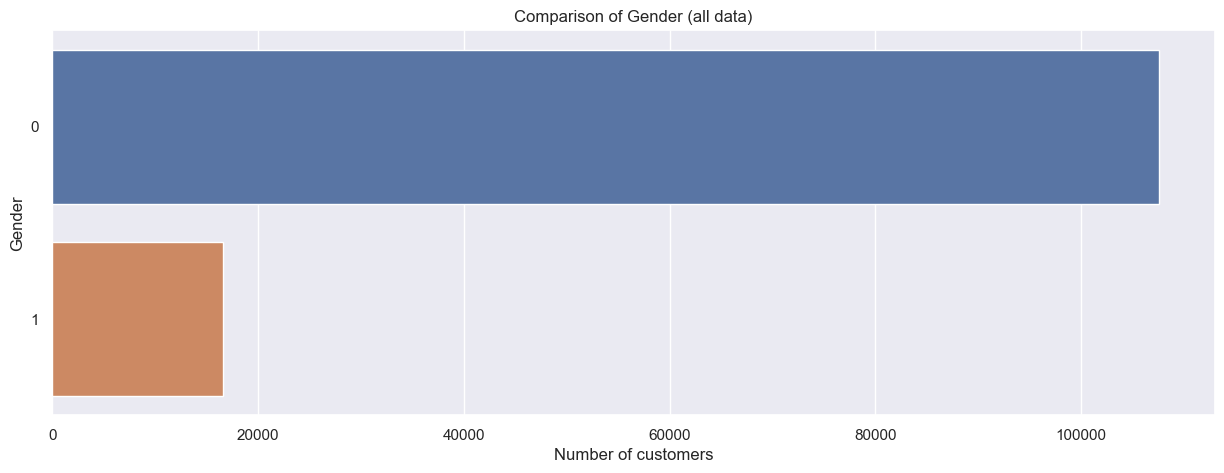

In [102]:
#all- gender
all_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data=merged_cleaned)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (all data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')

plt.savefig("all_gender.png")

plt.show()


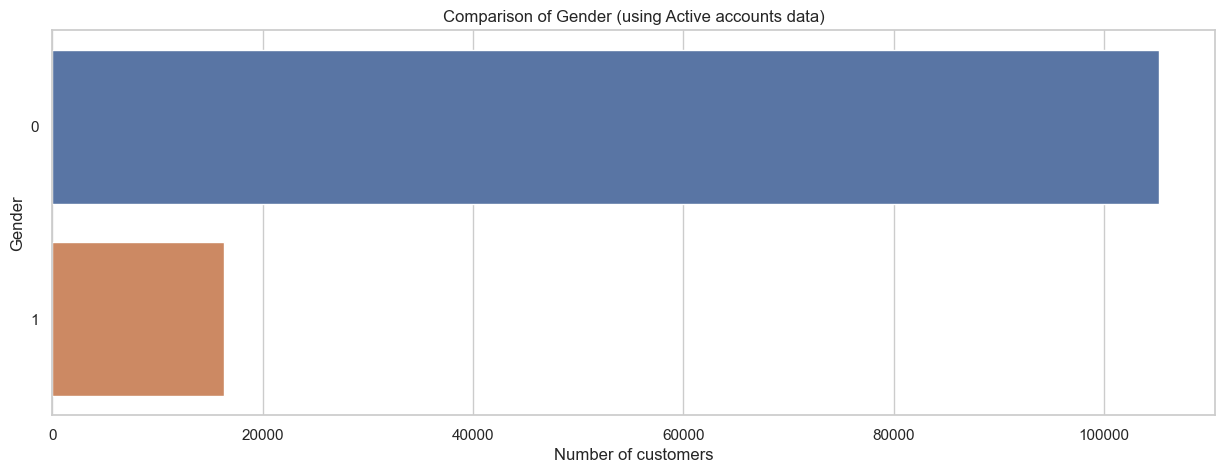

In [103]:
#active- gender
active_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= active_df)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (using Active accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')
plt.savefig("active_gender.png")

plt.show()

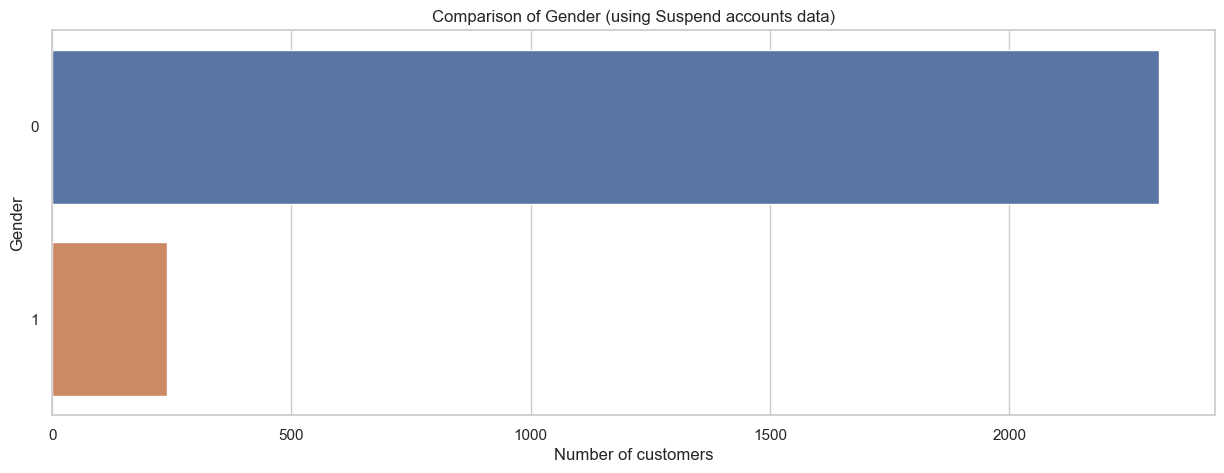

In [104]:
#suspend- gender
suspend_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= suspend_df)

sns.set_style('whitegrid')

plt.title('Comparison of Gender (using Suspend accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')

plt.savefig("suspend_gender.png")

plt.show()

# Age

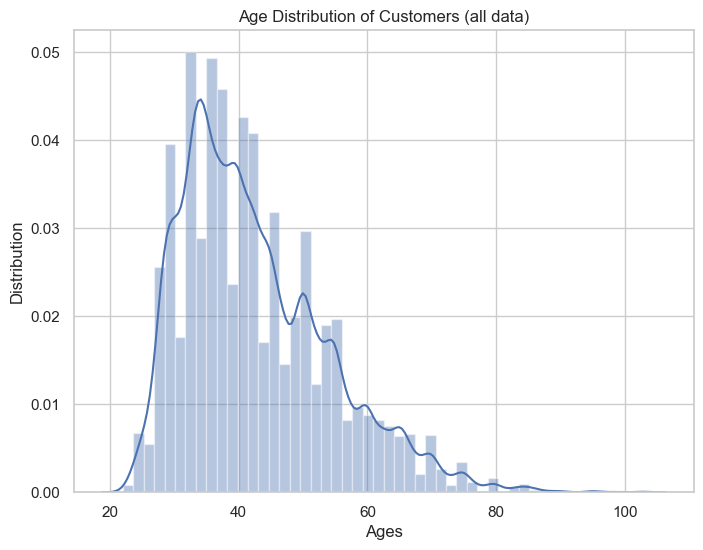

In [105]:
#age- all
all_age= sns.distplot(merged_cleaned['age'])

plt.title('Age Distribution of Customers (all data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_all.png")

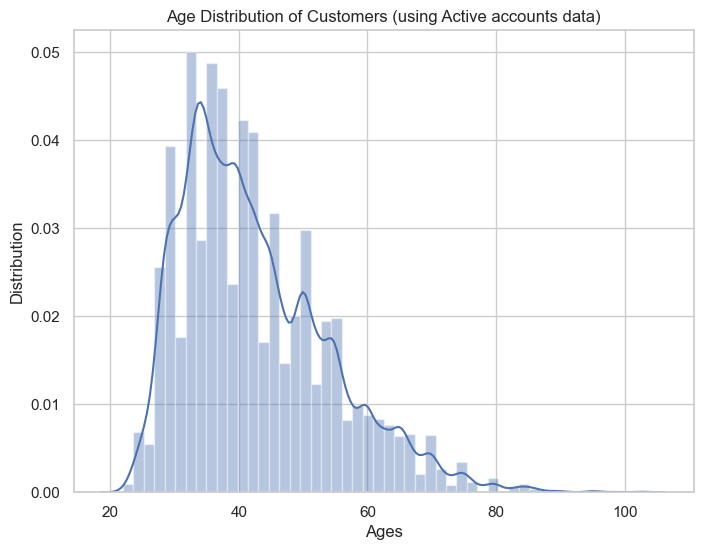

In [106]:
#age- active
all_age= sns.distplot(active_df['age'])

plt.title('Age Distribution of Customers (using Active accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_active.png")

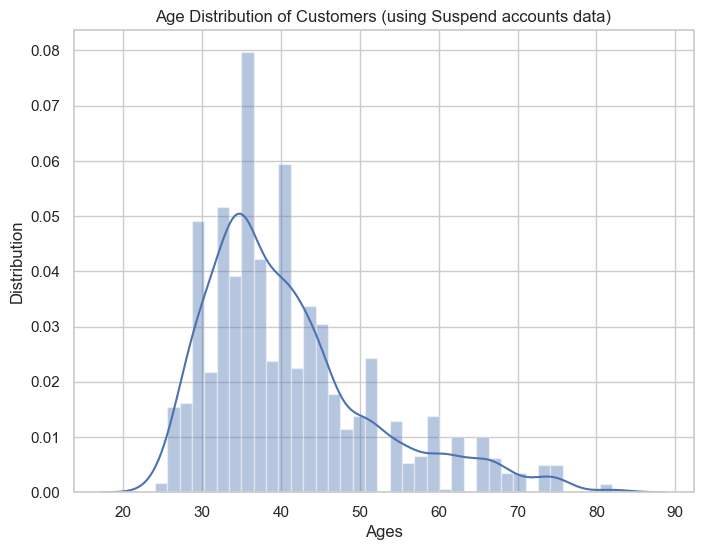

In [107]:
#age- suspend
all_age= sns.distplot(suspend_df['age'])

plt.title('Age Distribution of Customers (using Suspend accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')

plt.savefig("age_suspend.png")

# Decade

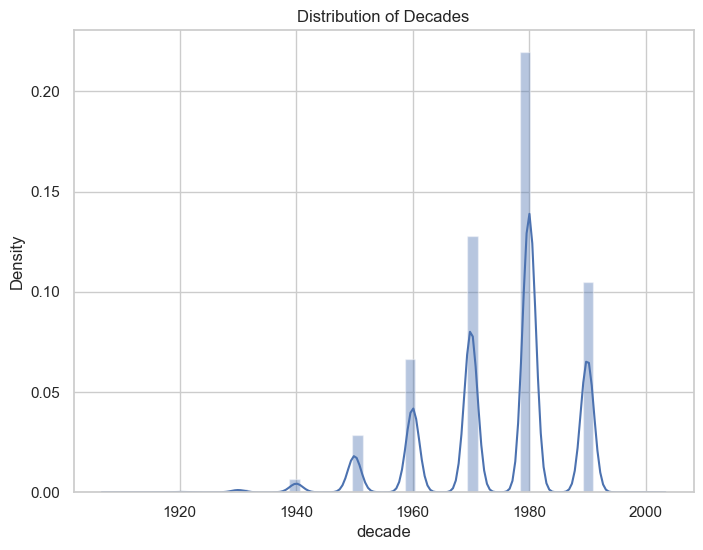

In [108]:
sns.distplot(merged_cleaned['decade'])
plt.title('Distribution of Decades')
plt.savefig('Basic_decade.png')

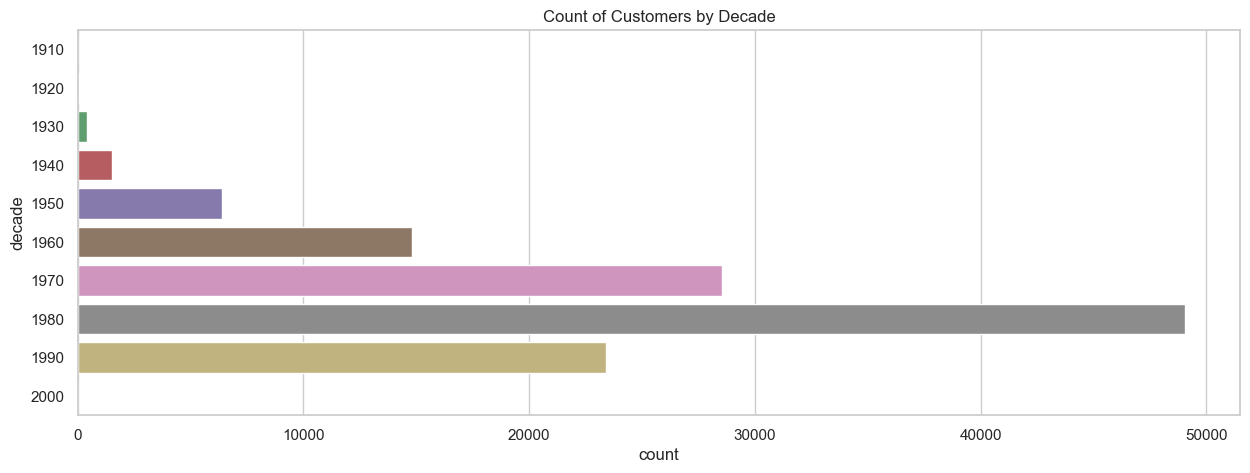

In [109]:
plt.figure(figsize=(15,5))
sns.countplot(y='decade', data= merged_cleaned)
plt.title('Count of Customers by Decade')
plt.savefig("Basic_decades_p2.png")
plt.show()


# ***Regression Tree***

# Assigning test and training data

In [110]:
#Testing on churn rate/system_status
X = merged_cleaned.drop('system_status', axis=1).values# Input features (attributes)
y = merged_cleaned['system_status'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# using a 80-train/20-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (124150, 7)
y shape: (124150,)


# Determining and setting hyperparameters


In [111]:
# Function to evaluate best max_depth and min_samples_leaf

best_acc = 0

for criterion in ['gini', 'entropy']:
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            test_predictions = dtree.predict(X_test)
            test_acc = accuracy_score(y_test, test_predictions)
            if test_acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = test_acc

print(best_params)
print(best_acc)

criterion: gini, max_depth: 2, min_samples_leaf: 5
0.9789770438985098


# Setting parameters to library function for regression tree

In [112]:
#Setting decision tree for max_depth of 2 + min_samples_split of 5
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 2,min_samples_split=5, random_state=1) #if use max_depth=8, we can see SUSPEND
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                       random_state=1)

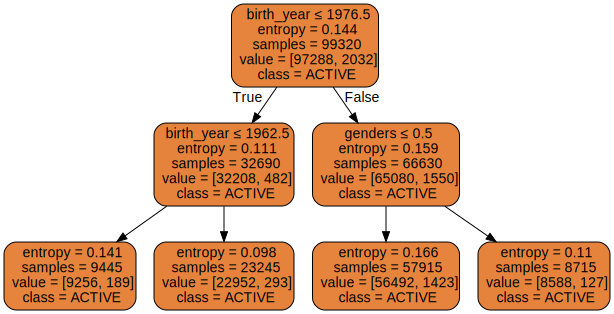

In [113]:
#Regression Tree Chart

import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=merged_cleaned.drop('system_status', axis=1).columns,
    class_names=merged_cleaned['system_status'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph



In [114]:
graph.render(directory='doctest-output').replace('\\', '/')
'doctest-output/regresstree_8_depth.gv.png'

'doctest-output/regresstree_8_depth.gv.png'

# Proportion of importance by column


In [115]:
# Calculating FI
for i, column in enumerate(merged_cleaned.drop('system_status', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

#We see at this level, the highest importance featuer is birth_year

Importance of feature week_number:, 0.000
Importance of feature genders:, 0.259
Importance of feature birth_year:, 0.741
Importance of feature paid_status:, 0.000
Importance of feature revenue:, 0.000
Importance of feature decade:, 0.000
Importance of feature age:, 0.000


,index,Variable,Feature Importance Score
0,2,birth_year,0.74148
1,1,genders,0.25852
2,0,week_number,0.00000
3,3,paid_status,0.00000
4,4,revenue,0.00000
5,5,decade,0.00000
6,6,age,0.00000


# Accuracy test on train/test

In [116]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

#We see a 97% accuracy level

Training Accuracy is:  0.9795408779701973
Testing Accuracy is:  0.9789770438985098


# Importing the Confusion Matrix function

In [117]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# *Heat Map*

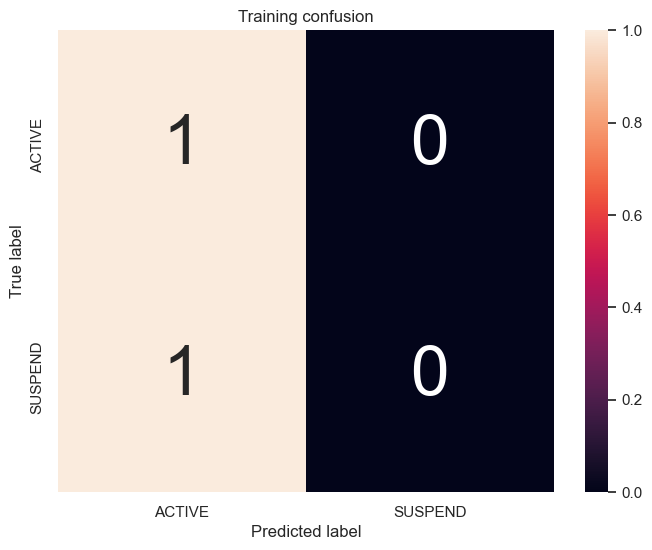

In [118]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

#We see huge concern considering the value of True Positives and False Negatives is the same....

# The values in each quadrant


In [119]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[97288,     0],
       [ 2032,     0]], dtype=int64)

# **Random Forest**

# Setting up

Training Accuracy is:  0.9798530004027386
Testing Accuracy is:  0.9773258155457109


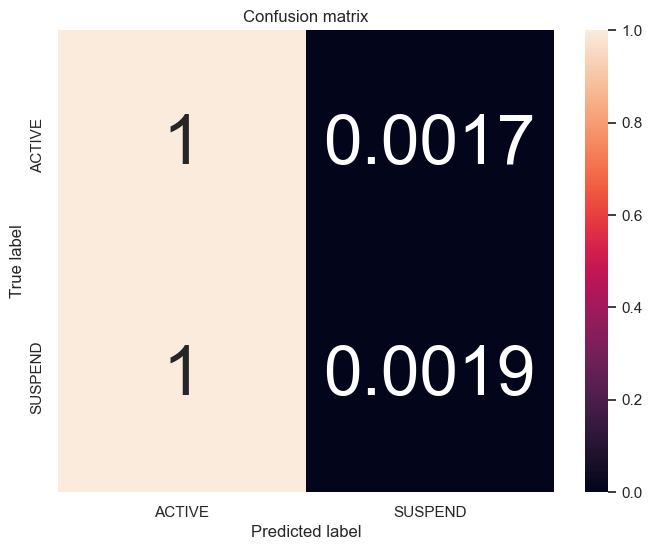

In [120]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)



# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

# *Confusion Matrix of Multiple RFs*

Classification accuracy on test set with max features = 1 and max_depth = None: 0.977
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.979
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.979
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.979
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.979
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.977
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.979
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.979
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.979
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.979
Classification accuracy on test set with max features = log2 and max_depth = None: 0.977
Classification accuracy on test set with max features = log2

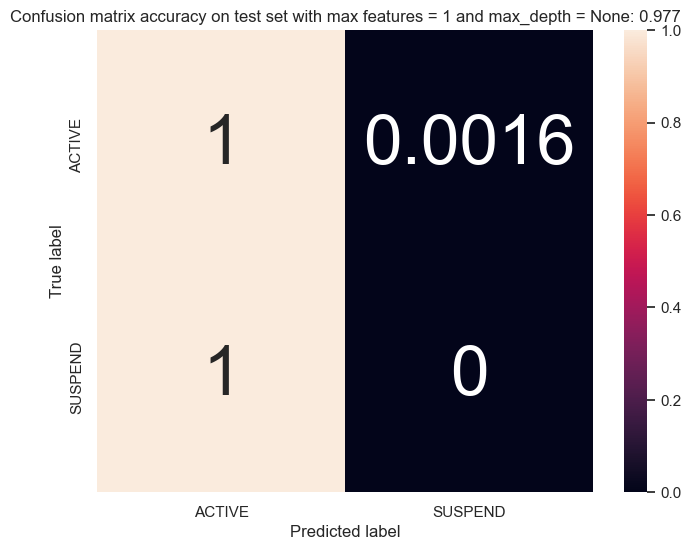

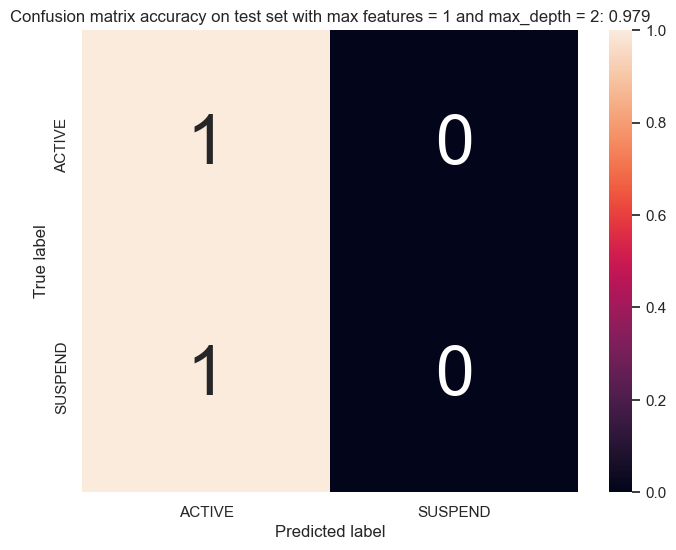

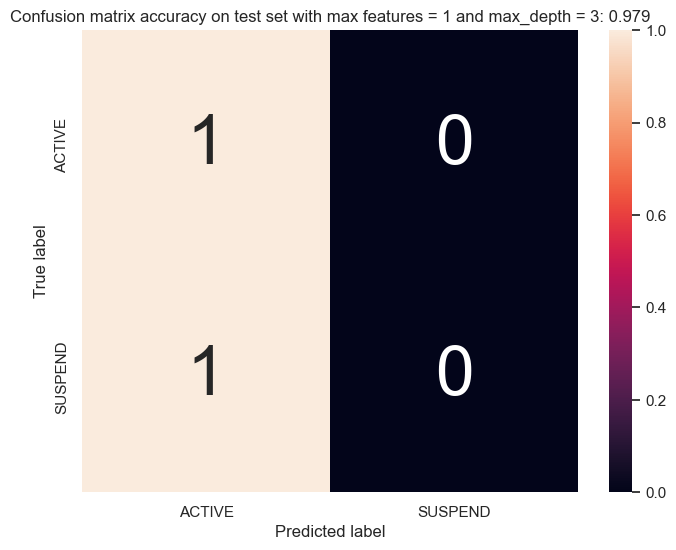

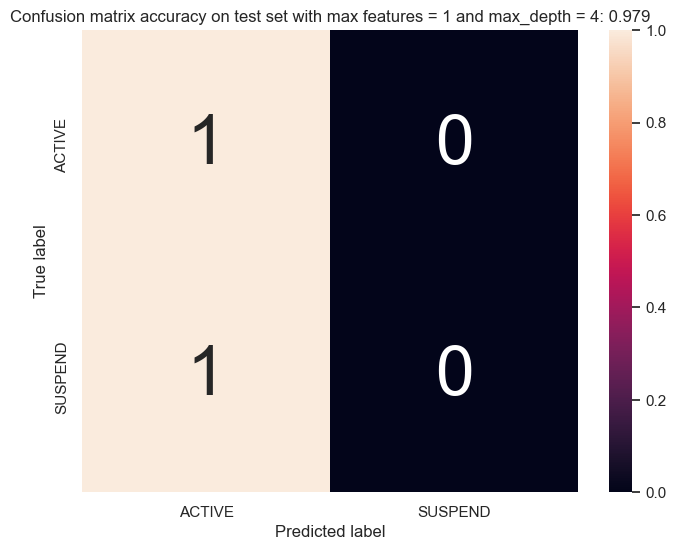

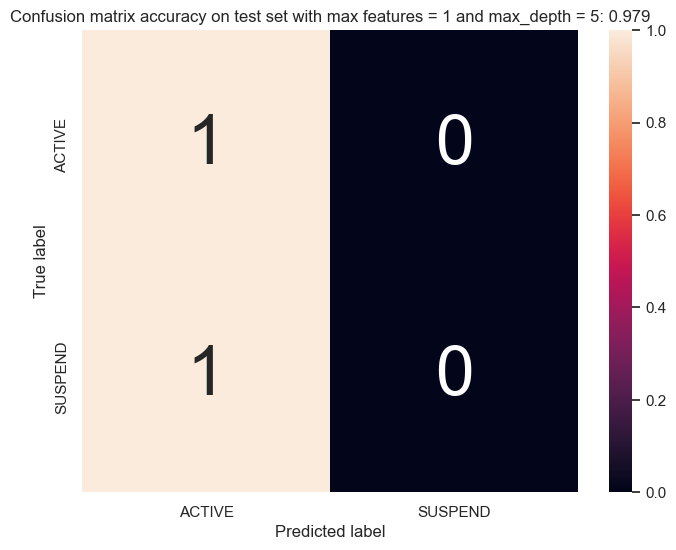

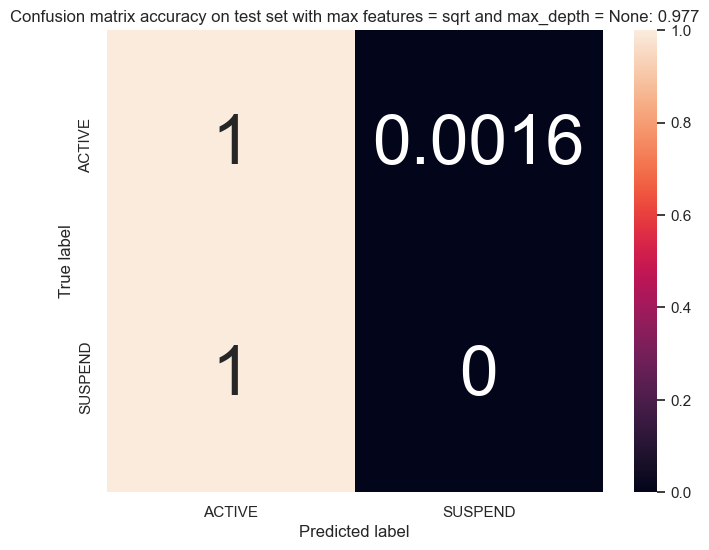

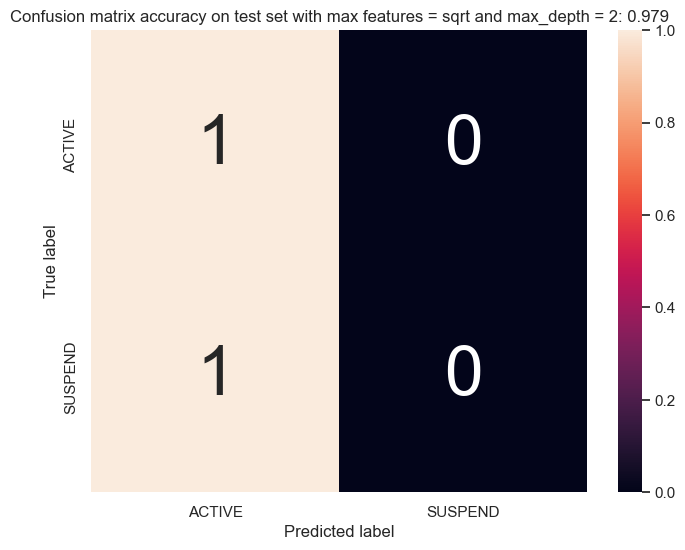

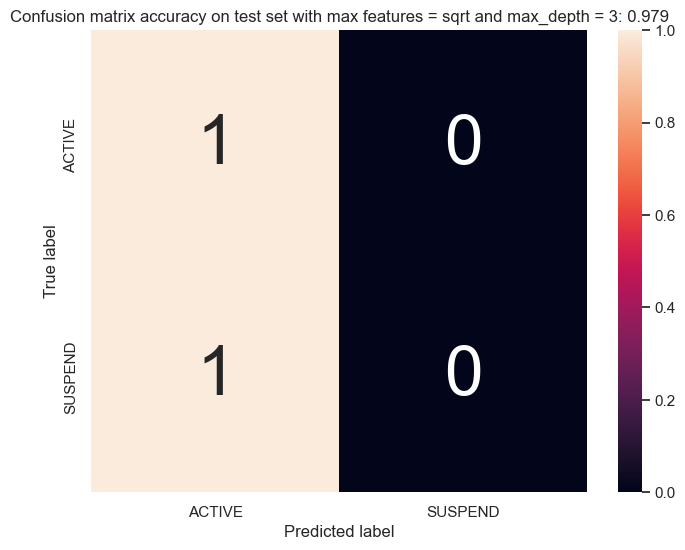

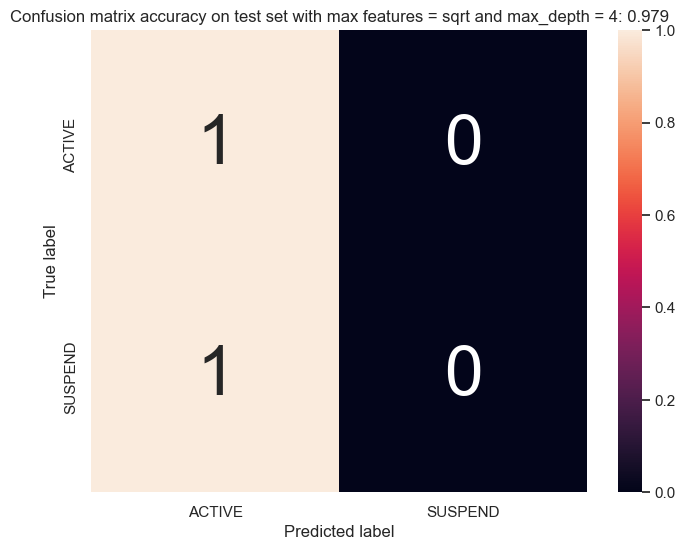

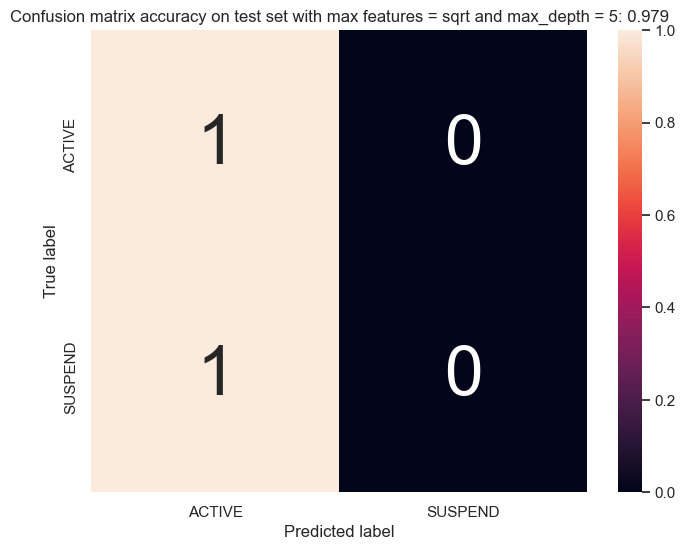

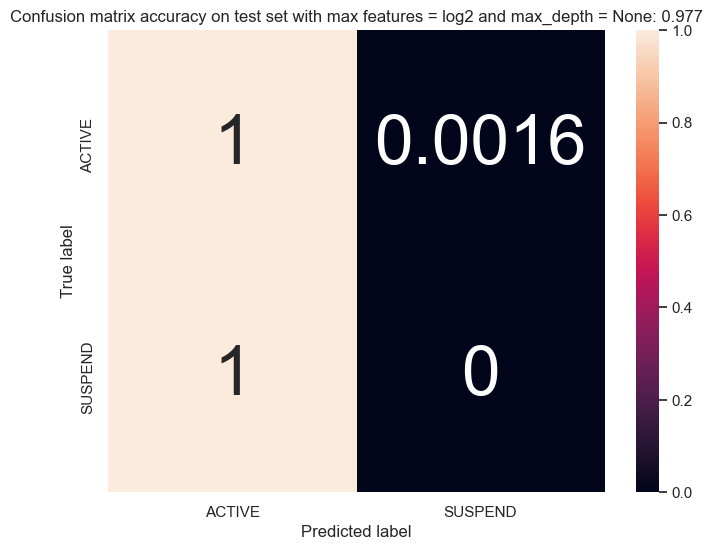

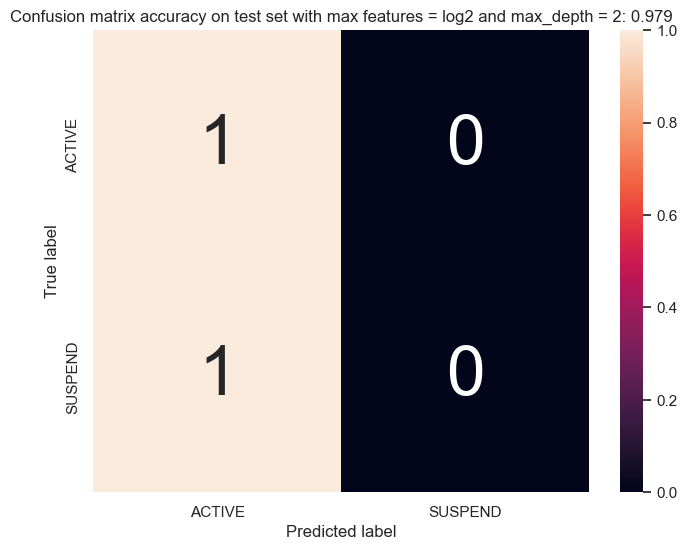

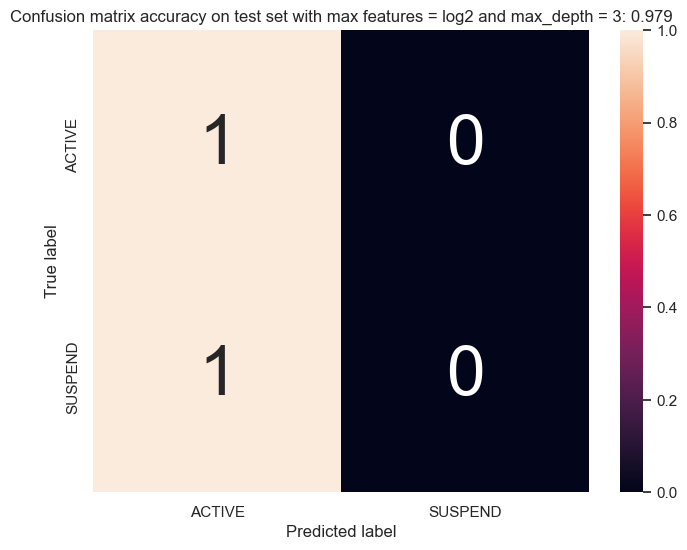

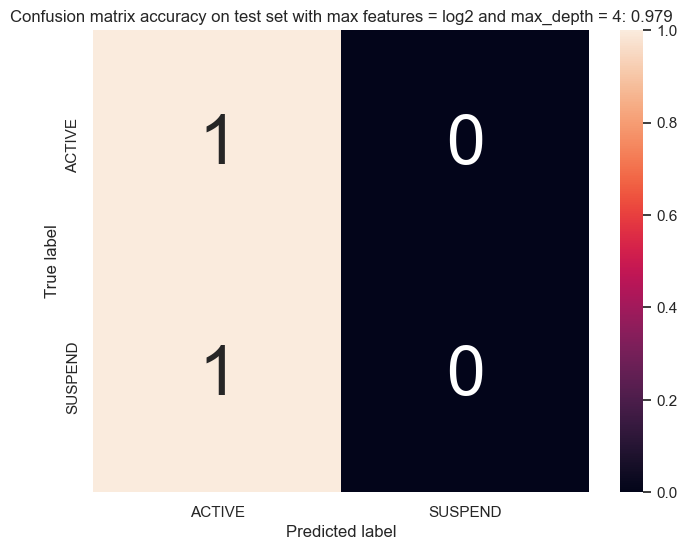

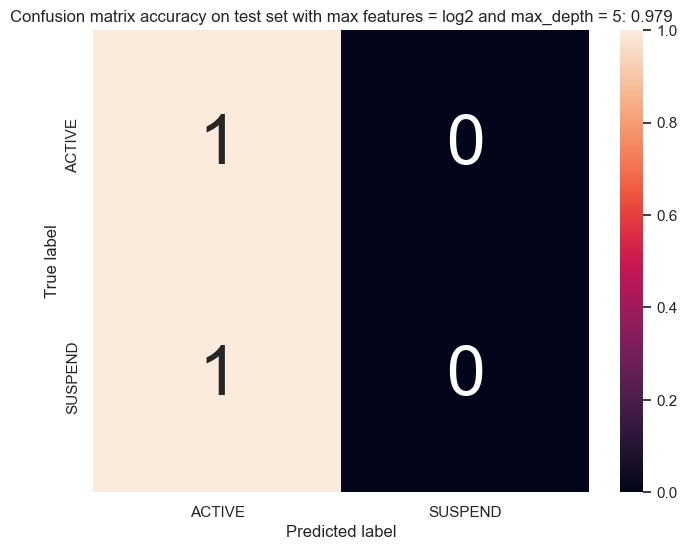

In [121]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

# **K-means**

# Assigning test and training data

In [122]:
#Testing on churn rate/system_status
X = merged_cleaned.drop('system_status', axis=1).values# Input features (attributes)
y = merged_cleaned['system_status'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)


X shape: (124150, 7)
y shape: (124150,)


In [123]:
k_means_df = merged_cleaned
k_means_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124150 entries, 0 to 213232
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   system_status  124150 non-null  object
 1   week_number    124150 non-null  int64 
 2   genders        124150 non-null  int64 
 3   birth_year     124150 non-null  int32 
 4   paid_status    124150 non-null  int64 
 5   revenue        124150 non-null  int32 
 6   decade         124150 non-null  int64 
 7   age            124150 non-null  int32 
dtypes: int32(3), int64(4), object(1)
memory usage: 7.1+ MB


# Setting x to only birth_year, revenue columns

In [124]:
x= k_means_df.iloc[:, [7,5]].values
x #an array of [age, revenue]

array([[34,  8],
       [34,  4],
       [34, 19],
       ...,
       [70, 10],
       [70, 10],
       [70, 14]])

In [125]:
from sklearn.cluster import KMeans
wcss = []

In [126]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# *Elbow Chart*

In [127]:
sum_of_sqr_dist_1 = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(x)
    sum_of_sqr_dist_1[k] = km.inertia_

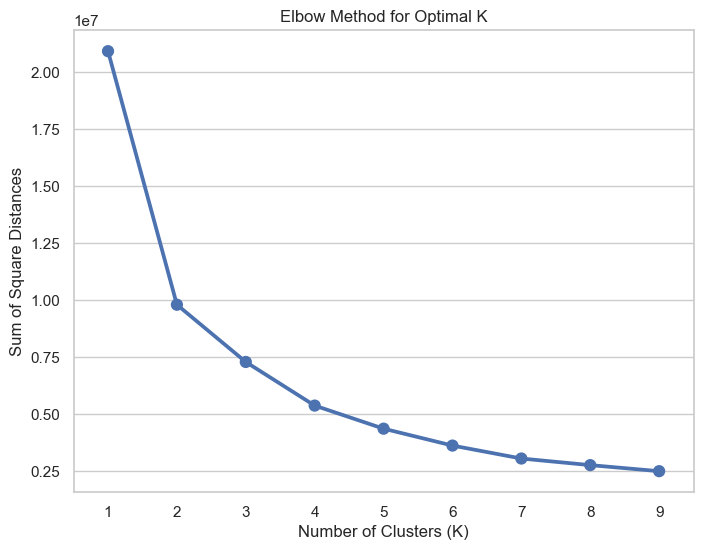

In [128]:
sns.pointplot(x=list(sum_of_sqr_dist_1.keys()), y=list(sum_of_sqr_dist_1.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying clusters to method


In [129]:
kmeansmodel = KMeans(n_clusters =5, init= 'k-means++', random_state=0)
kmeansmodel

KMeans(n_clusters=5, random_state=0)

In [130]:
y_kmeans= kmeansmodel.fit_predict(x)


# *Cluster Map*

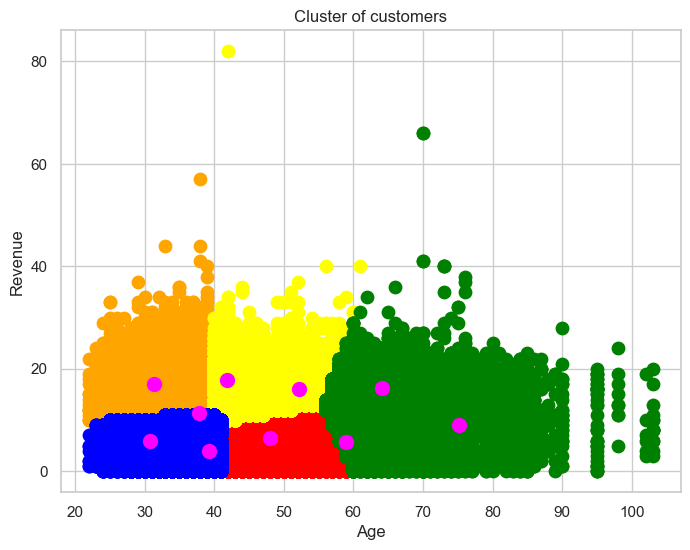

In [131]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=80, c='red', label= 'Customer Segment 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=80, c='orange', label= 'Customer Segment 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=80, c='yellow', label= 'Customer Segment 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=80, c='green', label= 'Customer Segment 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=80, c='blue', label= 'Customer Segment 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='magenta', label= 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.legend
plt.show()

# *Comparison Charts by Features*
(dataframe represents **only SUSPEND** accounts)

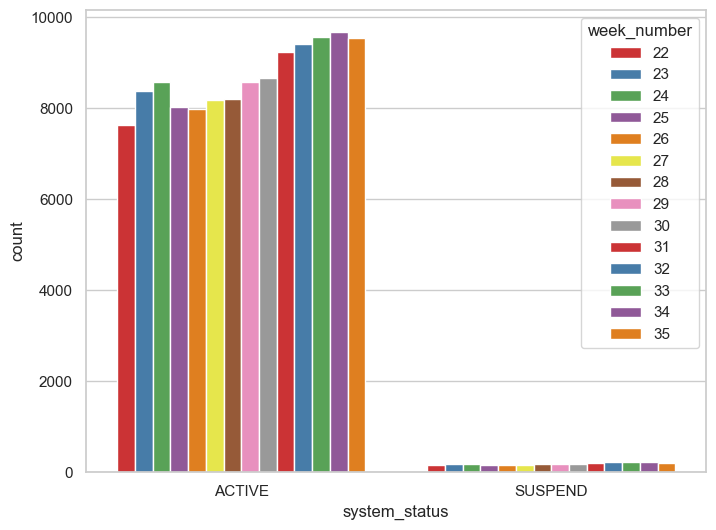

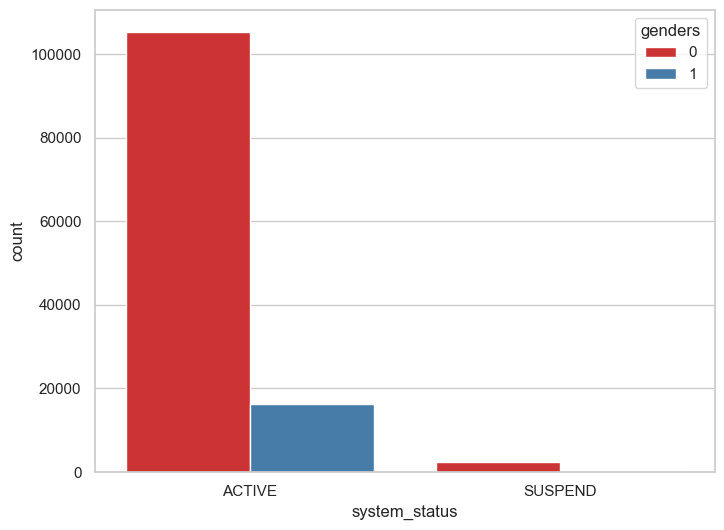

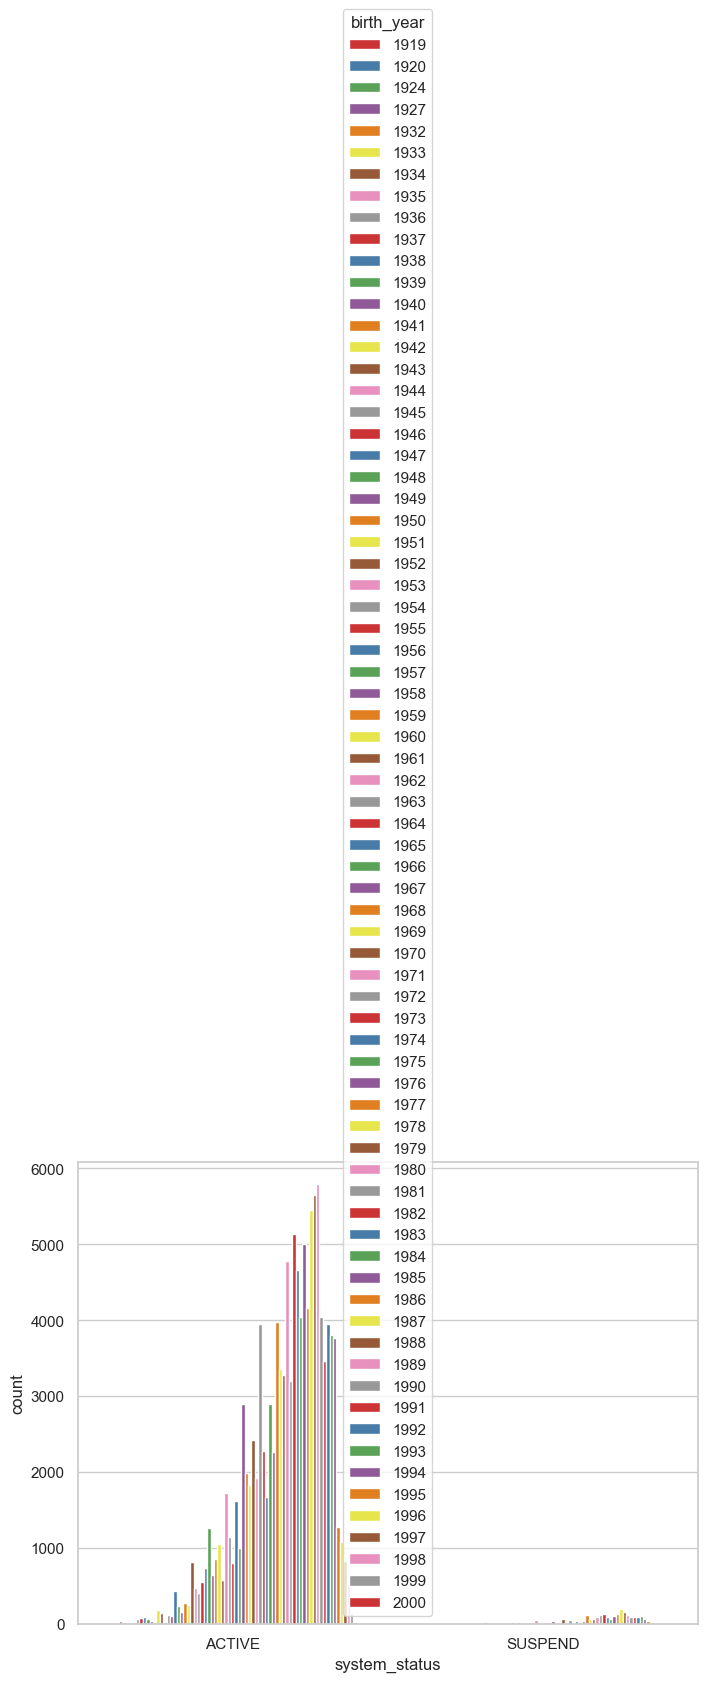

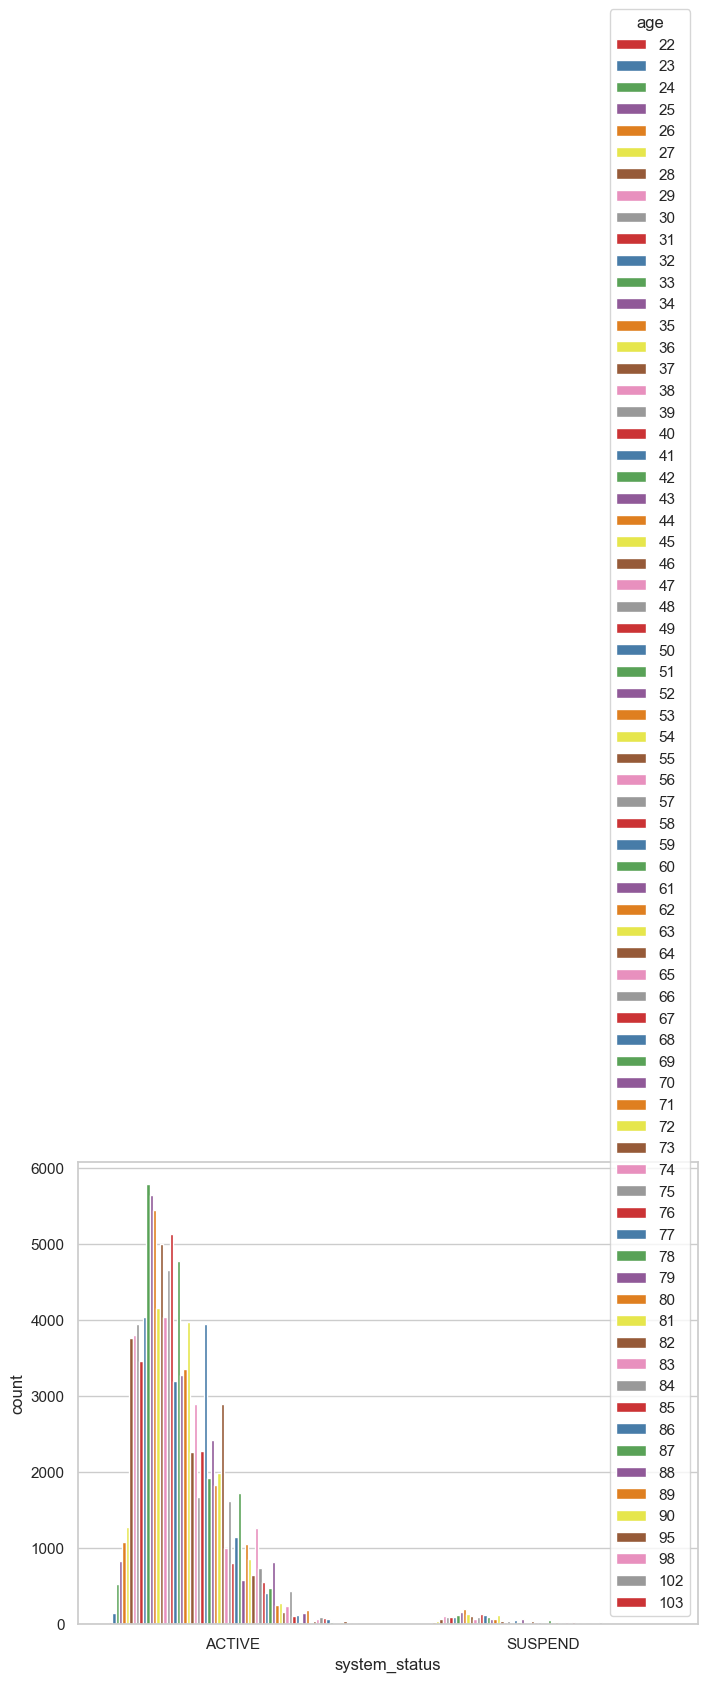

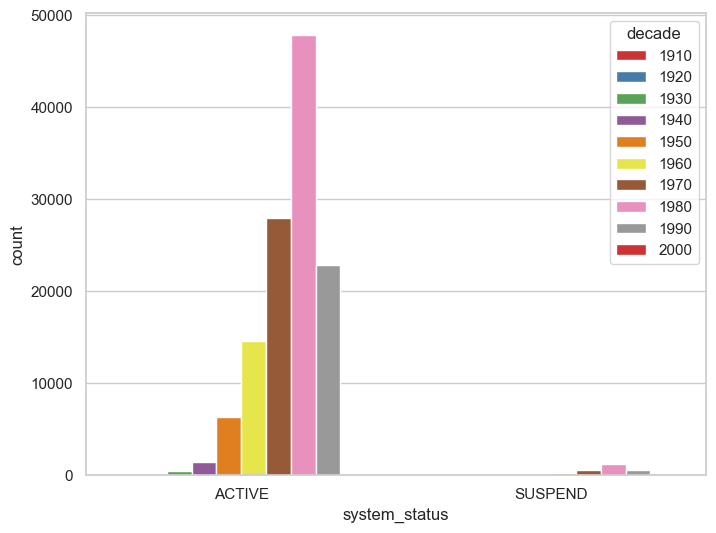

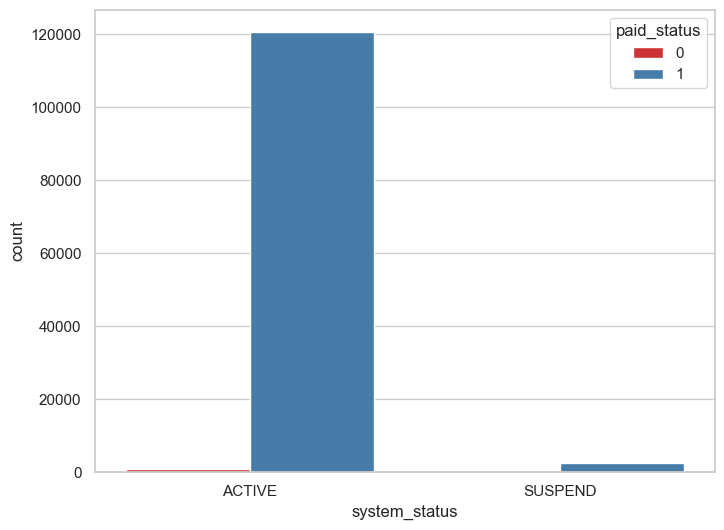

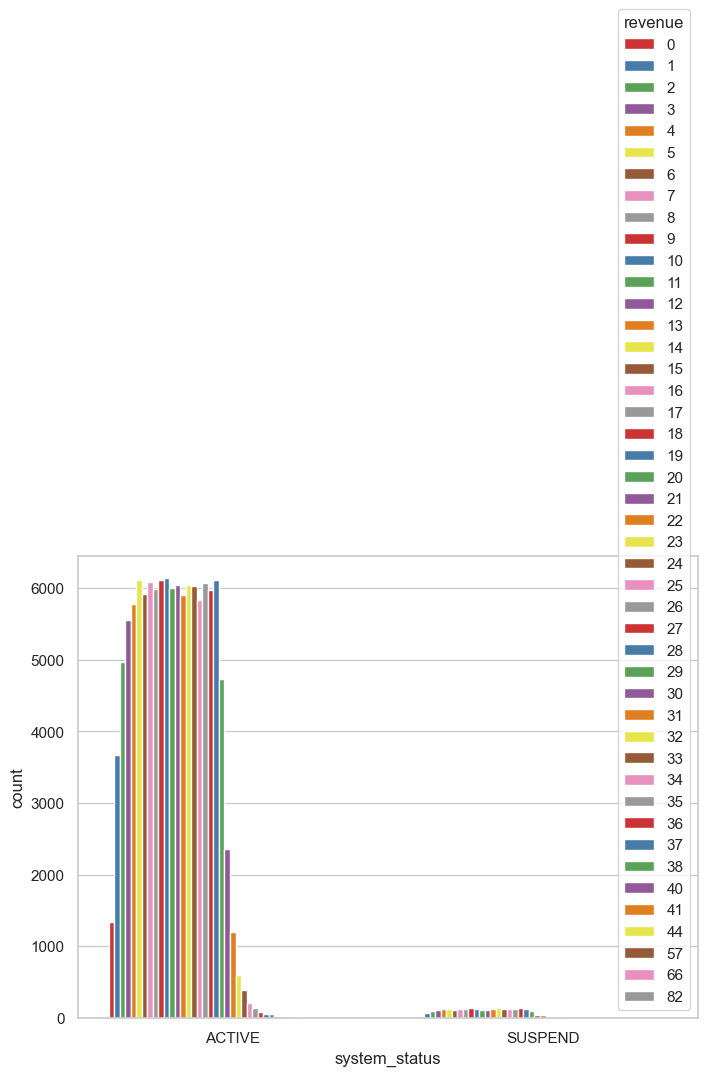

In [132]:
features = ['week_number', 'genders', 'birth_year', 'age', 'decade','paid_status', 'revenue'] #just on the demographics

for f in features:
    plt.figure()
    ax = sns.countplot(x='system_status', data=merged_cleaned, hue = f, palette="Set1")

#  **Regression Tree**
(dataframe represents **only SUSPEND** accounts)

# Determining and setting hyperparameters


In [133]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_split=5, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=1)

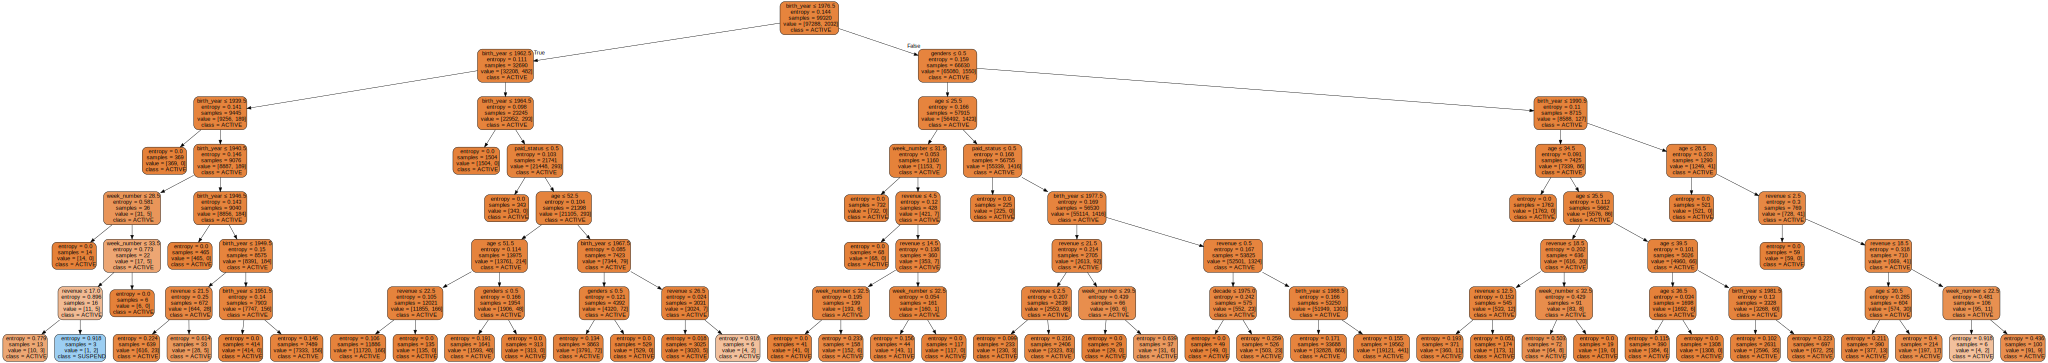

In [134]:
#Regression Tree Chart

import graphviz

dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names=merged_cleaned.drop('system_status', axis=1).columns,
    class_names=merged_cleaned['system_status'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

